<div style="border-radius:10px; padding: 15px; background-color: #EFEDF8; font-size:120%; text-align:left">

<h1 align="center"><font color=#hdc388> F⚽otball - Predicting the value of players.</font></h1>


---
<h2 align="right" style="font-size: 25px; color: black;"> by: Víctor Nuñez</h2>
    
<h2 align="right" style="font-size: 15px; color: black;"> Practice Nootebook</h2>


<div style="text-align:center;">
    <img src="https://footballfinanceblog.wordpress.com/wp-content/uploads/2014/07/eee.jpg" width="750">
</div>

Data: https://www.kaggle.com/datasets/yorkyong/football-player-statistics

<a id="libraries"></a>
# <b><span style="color:green;">Step 1 |</span><span style='color:#hdc388'> Libraries</span></b>

In [ ]:
from warnings import filterwarnings
filterwarnings('ignore')

# Data
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Machine Learning
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# Others tools
import re

<a id="data"></a>
# <b><span style="color:green;">Step 2 |</span><span style='color:#hdc388'> Load data</span></b>

In [ ]:
df = pd.read_csv('/kaggle/input/football-player-statistics/players_3120.csv')

<a id="data"></a>
## <b><span style="color:#6ADB80;">Step 2.1 |</span><span style='color:#hdc388'> Data overview</span></b>

In [ ]:
df.isna().sum()

name                       0
Age                        0
Overall rating             0
Potential                  0
Team & Contract            0
                        ... 
Shooting / Handling        0
Passing / Kicking          0
Dribbling / Reflexes       0
Defending / Pace           0
Unnamed: 64             3120
Length: 65, dtype: int64

In [ ]:
df.head()

,name,Age,Overall rating,Potential,Team & Contract,ID,Height,Weight,foot,Best overall,Best position,Growth,Value,Wage,Release clause,Total attacking,Crossing,Finishing,Heading accuracy,Short passing,Volleys,Total skill,Dribbling,Curve,FK Accuracy,Long passing,Ball control,Total movement,Acceleration,Sprint speed,Agility,Reactions,Balance,Total power,Shot power,Jumping,Stamina,Strength,Long shots,Total mentality,Aggression,Interceptions,Att. Position,Vision,Penalties,Composure,Total defending,Defensive awareness,Standing tackle,Sliding tackle,Total goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total stats,Base stats,International reputation,Pace / Diving,Shooting / Handling,Passing / Kicking,Dribbling / Reflexes,Defending / Pace,Unnamed: 64
0,15 Ronaldinho CAM ST,34,78,78,Querétaro\n2014 ~ 2016,28130,"182cm / 6'0""",76kg / 168lbs,Right,77,CAM,0,€4.1M,€45K,€0,367,84,69,50,82,82,430,86,86,87,81,90,313,50,48,73,70,72,314,74,55,41,72,72,319,60,25,66,82,86,0,78,25,28,25,54,7,14,13,6,14,1875,377,3,49,72,83,84,28,NaN
1,O. Hutchinson RM CAM,19,65,81,Ipswich Town\n2022 ~ 2025,260145,"174cm / 5'9""",65kg / 143lbs,Left,67,CAM,16,€1.8M,€3K,€4.5M,266,48,53,49,66,50,304,69,52,50,65,68,366,76,69,81,61,79,272,62,56,63,47,44,264,41,37,60,65,61,63,140,40,49,51,39,10,7,9,5,8,1651,351,1,72,54,61,70,44,NaN
2,Brahim CAM,23,82,86,Real Madrid\n2019 ~ 2027,231410,"170cm / 5'7""",68kg / 150lbs,Right,84,CAM,4,€43.5M,€145K,€92.4M,328,75,76,30,83,64,379,84,74,61,75,85,429,85,85,89,79,91,332,73,60,68,55,76,294,44,33,78,81,58,79,84,40,23,21,51,13,9,13,10,6,1897,409,1,85,74,78,85,31,NaN
3,K. Wätjen CM,17,62,80,Borussia Dortmund\n2024 ~ 2028,70728,"178cm / 5'10""",72kg / 159lbs,Right,65,CAM,18,€1M,€900,€2.3M,257,48,53,45,67,44,292,66,52,43,65,66,356,77,68,78,59,74,267,48,58,63,51,47,263,47,54,54,59,49,49,161,50,55,56,48,9,13,7,11,8,1644,353,1,72,50,59,66,52,NaN
4,A. Güler CAM RM,18,77,88,Real Madrid\n2023 ~ 2029,264309,"175cm / 5'9""",70kg / 154lbs,Left,79,CAM,11,€22M,€41K,€49.5M,340,80,68,41,81,70,403,83,84,76,79,81,380,75,69,82,69,85,308,72,50,70,43,73,316,42,55,68,80,71,77,155,52,57,46,58,13,10,11,14,10,1960,405,1,72,70,80,81,52,NaN


In [ ]:
df.duplicated().sum()

371

In [ ]:
df.drop_duplicates(inplace= True)

In [ ]:
#Save name and ID
name = df['name'].apply(lambda x: x.split()[:2])
name = name.apply(lambda x: ' '.join(x))
ID = df['ID']

df =  df.drop(['name', 'ID', 'Unnamed: 64'], axis = 1)

In [ ]:
df_1 = df.copy()

<a id="preprocessing"></a>
# <b><span style="color:green;">Step 3 |</span><span style='color:#hdc388'> Preprocessing</span></b>

<a id="Categoricals"></a>
## <b><span style="color:#6ADB80;">Step 3.1 |</span><span style='color:#hdc388'> Categoricals</span></b>

In [ ]:
df_1.select_dtypes(object).columns

Index(['Overall rating', 'Potential', 'Team & Contract', 'Height', 'Weight',
       'foot', 'Best position', 'Value', 'Wage', 'Release clause', 'Crossing',
       'Finishing', 'Heading accuracy', 'Short passing', 'Volleys',
       'Dribbling', 'Curve', 'FK Accuracy', 'Long passing', 'Ball control',
       'Acceleration', 'Sprint speed', 'Agility', 'Reactions', 'Balance',
       'Shot power', 'Jumping', 'Stamina', 'Strength', 'Long shots',
       'Aggression', 'Interceptions', 'Att. Position', 'Vision', 'Penalties',
       'Composure', 'Defensive awareness', 'Standing tackle', 'Sliding tackle',
       'GK Diving', 'GK Handling', 'GK Kicking', 'GK Positioning',
       'GK Reflexes'],
      dtype='object')

In [ ]:
#Fields with '+' or '-''
def sum_field_with_plus_minus(text):
    if len(re.findall(r'(\+|\-)', text)) != 0:
        number = sum(map(int,re.findall(r'\d+', text)))
        return number
    else:
        return int(text)


for col in df.drop(['Team & Contract','Height','Weight','foot',
                    'Best position', 'Value', 'Wage',
                    'Release clause'], axis = 1).select_dtypes(object).columns:
    df_1[col]=df_1[col].apply(sum_field_with_plus_minus)

In [ ]:
for col in ['Value', 'Wage', 'Release clause']:
    df_1[col] =  df_1[col].str.replace('€','')\
                          .str.replace('M', 'E6')\
                          .str.replace('K', 'E3').astype(float)

In [ ]:
df_1.select_dtypes(object)

,Team & Contract,Height,Weight,foot,Best position
0,Querétaro\n2014 ~ 2016,"182cm / 6'0""",76kg / 168lbs,Right,CAM
1,Ipswich Town\n2022 ~ 2025,"174cm / 5'9""",65kg / 143lbs,Left,CAM
2,Real Madrid\n2019 ~ 2027,"170cm / 5'7""",68kg / 150lbs,Right,CAM
3,Borussia Dortmund\n2024 ~ 2028,"178cm / 5'10""",72kg / 159lbs,Right,CAM
4,Real Madrid\n2023 ~ 2029,"175cm / 5'9""",70kg / 154lbs,Left,CAM
...,...,...,...,...,...
3107,Slavia Praha\n2022 ~ 2025,"175cm / 5'9""",73kg / 161lbs,Right,CAM
3108,Arouca\n2022 ~ 2025,"170cm / 5'7""",67kg / 148lbs,Right,RM
3109,"Gil Vicente\nJun 30, 2024 On loan","181cm / 5'11""",75kg / 165lbs,Right,CAM
3110,"Plymouth Argyle\nJun 30, 2024 On loan","191cm / 6'3""",80kg / 176lbs,Right,CM


In [ ]:
df_2 = df_1.copy()

- **Team and Contract can be splited in two fields**

In [ ]:
df_2['Team']= df_2['Team & Contract'].apply(lambda x: x.split('\n')[0])
df_2['Contract']= df_2['Team & Contract'].apply(lambda x: x.split('\n')[1])

df_2 = df_2.drop(['Team & Contract'], axis =  1)

In [ ]:
#Let's capitalize the name of the team
df_2['Team'] = df_2['Team'].str.upper()

In [ ]:
df_2['Contract'] = df_2['Contract'].str.replace('On', '~')

In [ ]:
def contract_extract_data(x):
    if len(x.split(',')) == 2:
        return(x.split(',')[1].strip())
    else:
        return(x.split(',')[0].strip())

df_2['Contract'] = df_2['Contract'].apply(contract_extract_data)

df_2['Contract'] = df_2['Contract'].str.replace('Free', '1 ~ 1')\
                                   .str.replace('loan', '0')

In [ ]:
for x in  df_2['Contract'].apply(lambda x: x.split('~')):
    if len(x) == 1:
        print(x)

['2009']
['2010']


In [ ]:
display(df_1['Team & Contract'][df_1['Team & Contract'].str.contains(r'2009')])
display(df_1['Team & Contract'][df_1['Team & Contract'].str.contains(r'2010')])

1988                 Celtic\n2009 ~ 2028
2052          Athletic Club\n2009 ~ 2024
2101                         Milan\n2009
2790          Athletic Club\n2009 ~ 2024
2863               Salzburg\n2009 ~ 2024
2871    Bayer 04 Leverkusen\n2009 ~ 2021
Name: Team & Contract, dtype: object

217     Real Madrid\n2010 ~ 2024
2102              Juventus\n2010
Name: Team & Contract, dtype: object

In [ ]:
# Assume 2024 as the end of the contract.
df_2.loc[2101, 'Contract'] = '2009~2024'
df_2.loc[2102, 'Contract'] = '2010~2024'

df_2['Contract_Start'] = df_2['Contract'].apply(lambda x: x.split('~')[0]).astype(int)
df_2['Contract_End'] = df_2['Contract'].apply(lambda x: x.split('~')[1]).astype(int)

df_2 = df_2.drop(['Contract'], axis =  1)


In [ ]:
df_2.select_dtypes(object)

,Height,Weight,foot,Best position,Team
0,"182cm / 6'0""",76kg / 168lbs,Right,CAM,QUERÉTARO
1,"174cm / 5'9""",65kg / 143lbs,Left,CAM,IPSWICH TOWN
2,"170cm / 5'7""",68kg / 150lbs,Right,CAM,REAL MADRID
3,"178cm / 5'10""",72kg / 159lbs,Right,CAM,BORUSSIA DORTMUND
4,"175cm / 5'9""",70kg / 154lbs,Left,CAM,REAL MADRID
...,...,...,...,...,...
3107,"175cm / 5'9""",73kg / 161lbs,Right,CAM,SLAVIA PRAHA
3108,"170cm / 5'7""",67kg / 148lbs,Right,RM,AROUCA
3109,"181cm / 5'11""",75kg / 165lbs,Right,CAM,GIL VICENTE
3110,"191cm / 6'3""",80kg / 176lbs,Right,CM,PLYMOUTH ARGYLE


In [ ]:
df_3 = df_2.copy()

- **Height and Weight**, We chose only one metric system.

In [ ]:
df_3['Height'] = df_3['Height'].apply(lambda x: x.split()[0]).str.replace('cm','').astype(int)
df_3['Weight'] = df_3['Weight'].apply(lambda x: x.split()[0]).str.replace('kg','').astype(int)

df_3 =  df_3.drop(['Height','Weight'], axis =  1)

In [ ]:
df_3['foot'] =  df_3['foot'].str.upper()

In [ ]:
df_4 =  df_3.copy()

In [ ]:
df_4.head()

,Age,Overall rating,Potential,foot,Best overall,Best position,Growth,Value,Wage,Release clause,Total attacking,Crossing,Finishing,Heading accuracy,Short passing,Volleys,Total skill,Dribbling,Curve,FK Accuracy,Long passing,Ball control,Total movement,Acceleration,Sprint speed,Agility,Reactions,Balance,Total power,Shot power,Jumping,Stamina,Strength,Long shots,Total mentality,Aggression,Interceptions,Att. Position,Vision,Penalties,Composure,Total defending,Defensive awareness,Standing tackle,Sliding tackle,Total goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total stats,Base stats,International reputation,Pace / Diving,Shooting / Handling,Passing / Kicking,Dribbling / Reflexes,Defending / Pace,Team,Contract_Start,Contract_End
0,34,78,78,RIGHT,77,CAM,0,4100000.0,45000.0,0.0,367,84,69,50,82,82,430,86,86,87,81,90,313,50,48,73,70,72,314,74,55,41,72,72,319,60,25,66,82,86,0,78,25,28,25,54,7,14,13,6,14,1875,377,3,49,72,83,84,28,QUERÉTARO,2014,2016
1,19,65,81,LEFT,67,CAM,16,1800000.0,3000.0,4500000.0,266,48,53,49,66,50,304,69,52,50,65,68,366,76,69,81,61,79,272,62,56,63,47,44,264,41,37,60,65,61,63,140,40,49,51,39,10,7,9,5,8,1651,351,1,72,54,61,70,44,IPSWICH TOWN,2022,2025
2,23,82,86,RIGHT,84,CAM,4,43500000.0,145000.0,92400000.0,328,75,76,30,83,64,379,84,74,61,75,85,429,85,85,89,79,91,332,73,60,68,55,76,294,44,33,78,81,58,79,84,40,23,21,51,13,9,13,10,6,1897,409,1,85,74,78,85,31,REAL MADRID,2019,2027
3,17,62,80,RIGHT,65,CAM,18,1000000.0,900.0,2300000.0,257,48,53,45,67,44,292,66,52,43,65,66,356,77,68,78,59,74,267,48,58,63,51,47,263,47,54,54,59,49,49,161,50,55,56,48,9,13,7,11,8,1644,353,1,72,50,59,66,52,BORUSSIA DORTMUND,2024,2028
4,18,77,88,LEFT,79,CAM,11,22000000.0,41000.0,49500000.0,340,80,68,41,81,70,403,83,84,76,79,81,380,75,69,82,69,85,308,72,50,70,43,73,316,42,55,68,80,71,77,155,52,57,46,58,13,10,11,14,10,1960,405,1,72,70,80,81,52,REAL MADRID,2023,2029


<a id="eda"></a>
# <b><span style="color:green;">Step 4 |</span><span style='color:#hdc388'> Exploratory Data Analysis</span></b>

**Variable vs player value**
<div style="border-radius:10px; padding: 10px; background-color: #D7E6C7; font-size:50%; text-align:left">

In [ ]:
len(df_4.select_dtypes(np.number).columns)

59

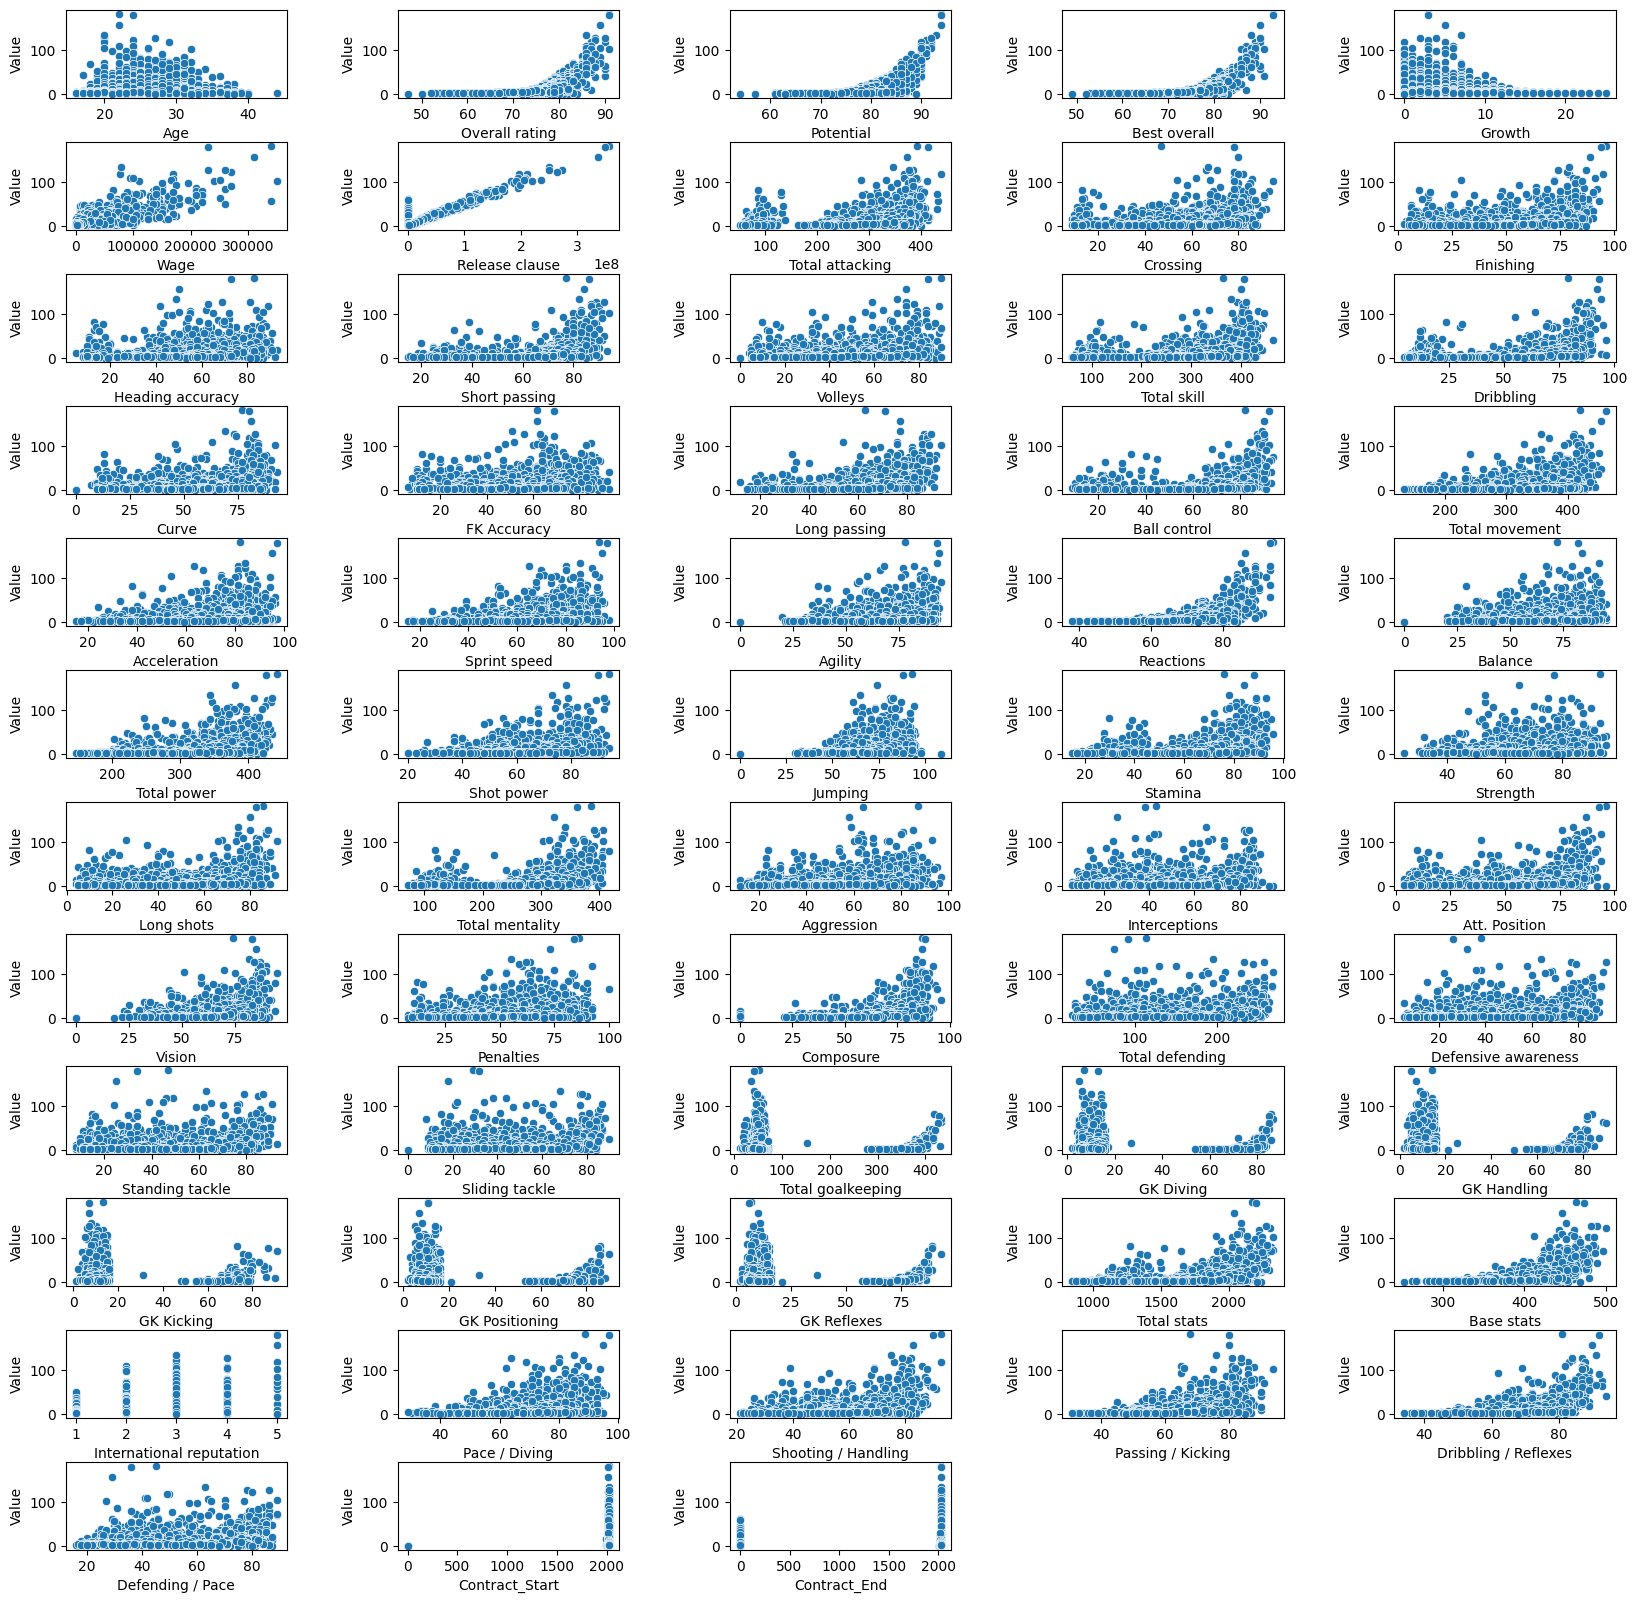

In [ ]:
plt.figure(figsize = (20,20))
plt.subplots_adjust(wspace=0.5, hspace=0.5)
for i,col in enumerate(df_4.select_dtypes(np.number).drop(['Value'],axis = 1)):
    plt.subplot(12,5,i+1)
    sns.scatterplot(data = df_4, x = col, y = df_4.Value/1E6)

In [ ]:
# To avoid multicollinearity, we discard “Release clause”.
df_4 =  df_4.drop(['Release clause', 'Wage'], axis =  1)

In [ ]:
df_4['Value'][lambda x: x==0]

184     0.0
263     0.0
291     0.0
308     0.0
341     0.0
       ... 
3083    0.0
3084    0.0
3085    0.0
3089    0.0
3090    0.0
Name: Value, Length: 74, dtype: float64

In [ ]:
# A test to prove the final model.
test = df_4.loc[df_4['Value'][lambda x: x==0].index]
test = test.drop(['Value'], axis = 1)

df_4 =  df_4.drop(df_4['Value'][lambda x: x==0].index)

#Target
target = df_4['Value']

**Top 10 teams with the most valuable players**
<div style="border-radius:10px; padding: 10px; background-color: #D7E6C7; font-size:50%; text-align:left">

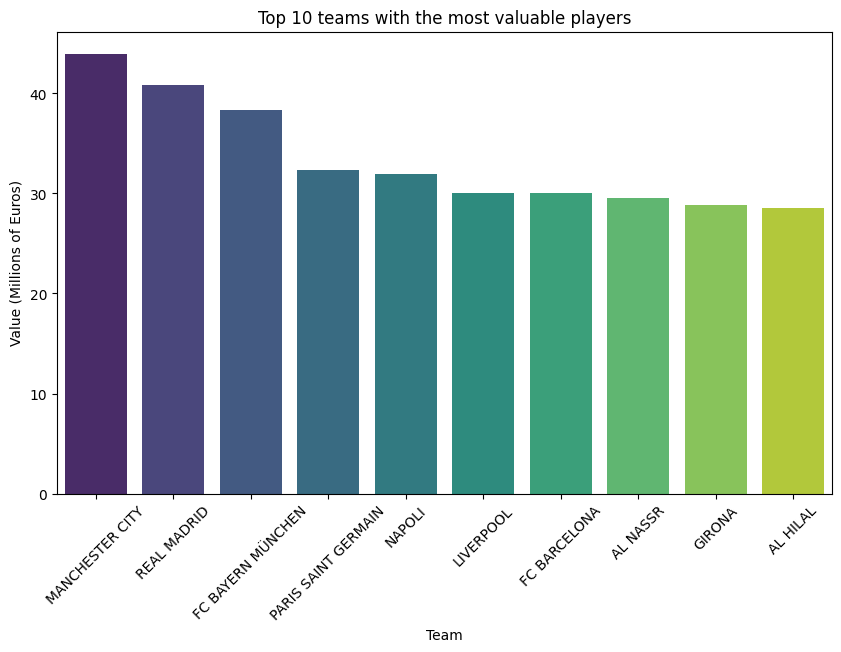

In [ ]:
value_team = df_4.groupby('Team')['Value'].mean().to_frame().reset_index()
top_10_most_value = value_team.sort_values(by= 'Value', ascending =  False)[:10]
top_10_most_value['Value'] = top_10_most_value['Value']/1E6

plt.figure(figsize=(10, 6))
sns.barplot(x='Team', y='Value', data=top_10_most_value, palette='viridis')

plt.xticks(rotation=45)
plt.ylabel('Value (Millions of Euros)')
plt.title('Top 10 teams with the most valuable players')
plt.xlabel('Team')

plt.show()

<div style="border-radius:10px; padding: 10px; background-color: #D7E6C7; font-size:50%; text-align:left">

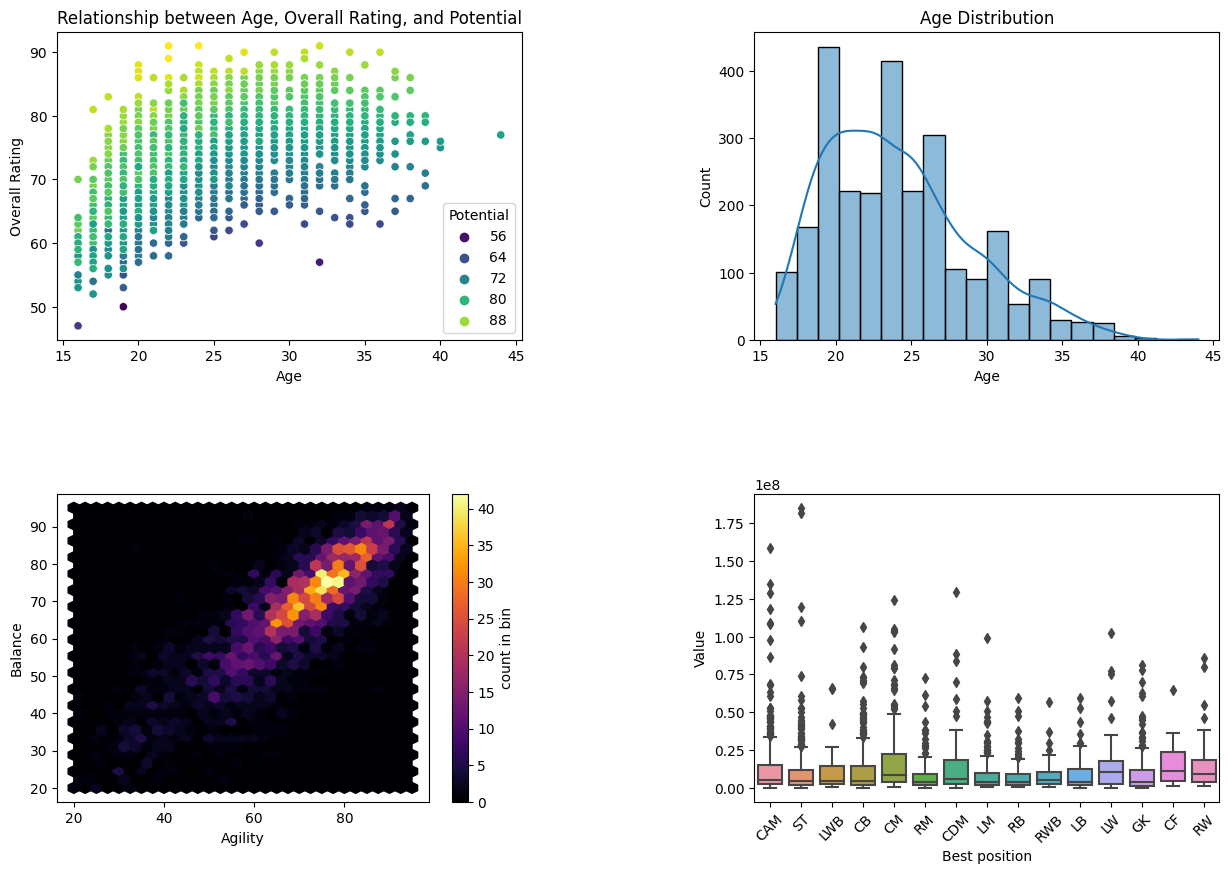

In [ ]:
plt.figure(figsize=(15, 10))
plt.subplots_adjust(wspace=0.5, hspace=0.5)

plt.subplot(2,2,1)
sns.scatterplot(data=df_4, x='Age', y='Overall rating', hue='Potential', palette='viridis')
plt.title('Relationship between Age, Overall Rating, and Potential')
plt.xlabel('Age')
plt.ylabel('Overall Rating')


# Histogram
plt.subplot(2,2,2)
sns.histplot(df_4['Age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')


# Hexbin plot for Agility and Balance
plt.subplot(2,2,3)
plt.hexbin(df_4['Agility'], df_4['Balance'], gridsize=30, cmap='inferno')
plt.colorbar(label='count in bin')
plt.xlabel('Agility')
plt.ylabel('Balance')


#Comparison of Skill Attributes by Best Position
plt.subplot(2,2,4)
sns.boxplot(x='Best position', y='Value', data=df_4)

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)
plt.show()

In [ ]:
df_4 =  df_4.drop(['Value'], axis = 1)

In [ ]:
df_5 =  df_4.copy()

<a id="eda"></a>
# <b><span style="color:green;">Step 5 |</span><span style='color:#hdc388'> Encoding, scaling and splitting</span></b>

<a id="Encoding"></a>
## <b><span style="color:#6ADB80;">Step 5.1 |</span><span style='color:#hdc388'> Encoding categoricals</span></b>

In [ ]:
enc =  LabelEncoder()

for col in df_5.select_dtypes(object).columns:
    df_5[col] =  enc.fit_transform(df_5[col])

<a id="scaling"></a>
## <b><span style="color:#6ADB80;">Step 5.2 |</span><span style='color:#hdc388'> Scaling</span></b>

In [ ]:
scaler = StandardScaler()
scaler.fit(df_5.iloc[:,:])
df_5.iloc[:,:] = scaler.transform(df_5.iloc[:,:])


In [ ]:
df_5.head()

,Age,Overall rating,Potential,foot,Best overall,Best position,Growth,Total attacking,Crossing,Finishing,Heading accuracy,Short passing,Volleys,Total skill,Dribbling,Curve,FK Accuracy,Long passing,Ball control,Total movement,Acceleration,Sprint speed,Agility,Reactions,Balance,Total power,Shot power,Jumping,Stamina,Strength,Long shots,Total mentality,Aggression,Interceptions,Att. Position,Vision,Penalties,Composure,Total defending,Defensive awareness,Standing tackle,Sliding tackle,Total goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total stats,Base stats,International reputation,Pace / Diving,Shooting / Handling,Passing / Kicking,Dribbling / Reflexes,Defending / Pace,Team,Contract_Start,Contract_End
0,2.065307,0.720117,-0.248344,0.615521,0.419760,-1.078205,-1.041602,1.057577,1.449445,0.656176,-0.463137,1.067964,1.638949,1.667340,1.114426,1.528748,2.036141,1.339023,1.402110,-0.699795,-1.494482,-1.687897,0.239225,-0.028256,0.261195,-0.295449,0.618545,-1.454757,-1.880331,0.369513,0.808446,0.408883,-0.148052,-1.227794,0.282353,1.385496,1.974300,-5.561364,-1.212301,-1.263921,-1.170490,-1.163101,-0.221699,-0.455974,-0.012743,-0.075182,-0.518605,-0.024539,0.297965,-0.452075,1.972374,-2.310364,0.759284,1.773356,1.463389,-1.481773,0.707691,-2.948538,0.372864
1,-1.061171,-1.234462,0.363932,-1.624640,-1.133295,-1.078205,1.740337,-0.367849,-0.592534,-0.141969,-0.521540,-0.219319,-0.082281,-0.042335,0.116601,-0.342731,-0.020803,0.166580,-0.083454,0.321235,0.387182,-0.138362,0.827865,-1.068417,0.749795,-1.133822,-0.341575,-1.366199,-0.345723,-1.632039,-0.631158,-0.472795,-1.289546,-0.688521,-0.026477,0.063297,0.407553,-0.382789,-0.256519,-0.563923,-0.224605,0.008880,-0.413788,-0.269803,-0.462961,-0.338588,-0.581448,-0.387204,-0.577440,-1.120594,-0.561776,-0.085557,-0.519289,-0.503849,-0.161875,-0.598266,-0.113725,0.155034,0.386054
2,-0.227444,1.321526,1.384392,0.615521,1.506899,-1.078205,-0.346117,0.507165,0.938950,1.005364,-1.631187,1.148420,0.670757,0.975329,0.997035,0.868226,0.590721,0.899357,1.064481,1.534912,1.038527,1.042237,1.416505,1.011905,1.587395,0.063854,0.538535,-1.011970,0.003051,-0.991542,1.014104,0.008120,-1.109310,-0.868279,0.900012,1.307720,0.219544,0.932405,-1.119806,-0.563923,-1.395701,-1.343406,-0.260117,-0.083632,-0.334328,-0.075182,-0.267231,-0.508092,0.383942,0.370718,-0.561776,1.171942,0.901348,1.255810,1.579479,-1.316115,0.819702,-1.008806,0.388985
3,-1.478035,-1.685519,0.159840,0.615521,-1.443906,-1.078205,2.088079,-0.494867,-0.592534,-0.141969,-0.755150,-0.138864,-0.405012,-0.205161,-0.059485,-0.342731,-0.409955,0.166580,-0.218505,0.128588,0.459553,-0.212149,0.607125,-1.299564,0.400795,-1.233628,-1.461716,-1.189085,-0.345723,-1.311790,-0.476914,-0.488826,-0.929074,0.075448,-0.335306,-0.403362,-0.344485,-1.533583,0.067213,-0.097258,0.045648,0.234261,-0.298534,-0.331860,-0.077060,-0.470292,-0.204388,-0.387204,-0.604796,-1.069170,-0.561776,-0.085557,-0.803417,-0.710867,-0.626237,-0.156513,-1.196501,0.930926,0.390450
4,-1.269603,0.569765,1.792576,-1.624640,0.730371,-1.078205,0.870981,0.676522,1.222558,0.606292,-0.988760,0.987509,0.993488,1.300981,0.938339,1.418661,1.424617,1.192468,0.794379,0.590941,0.314810,-0.138362,0.901445,-0.143830,1.168595,-0.415216,0.458525,-1.897543,0.142561,-1.952287,0.859860,0.360791,-1.229467,0.120387,0.385296,1.229943,1.034252,0.768005,-0.025282,-0.003925,0.135733,-0.216501,-0.170475,-0.083632,-0.270011,-0.206885,-0.015858,-0.266316,0.630149,0.267869,-0.561776,-0.085557,0.617220,1.462829,1.115118,-0.156513,0.819702,0.542980,0.391916


<a id="split"></a>
## <b><span style="color:#6ADB80;">Step 5.3 | </span><span style='color:#hdc388'>Split</span></b>

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_5, target, test_size= 0.1, random_state=2024)

<a id="eda"></a>
# <b><span style="color:green;">Step 6 |</span><span style='color:#hdc388'> Model Selection</span></b>

<a id="model"></a>
## <b><span style="color:#6ADB80;">Step 6.1 | </span><span style='color:#hdc388'>Ensemble Learning (GradientBoostingRegressor)</span></b>

<a id="model"></a>
### <b><span style="color:#27CB47;">Step 6.1.1 | </span><span style='color:#hdc388'>Hyper-parameters search </span></b>

In [ ]:
gbr_params = {'learning_rate':[0.1, 0.5, 1.0],
             'max_depth': [2,3,4,5],
             'n_estimators':[100,200],
             'random_state':[2024]
              }

gbr = GridSearchCV(GradientBoostingRegressor(), gbr_params, scoring='neg_mean_squared_error', n_jobs=-1, cv=6)
gbr.fit(X_train, y_train)
gbr_params = gbr.best_params_
best_estimator = gbr.best_estimator_


print('Best Params gbr model:',gbr.best_params_)
print('\n')
print('Best Score gbr model :', gbr.best_score_)

Best Params gbr model: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'random_state': 2024}


Best Score gbr model : -6082744263088.63


In [ ]:
feature_importances = best_estimator.feature_importances_
feature_importance_dict = dict(zip(X_train.columns, feature_importances))
list(feature_importance_dict.items())[:10]

[('Age', 0.04880557493588798),
 ('Overall rating', 0.0640644541765135),
 ('Potential', 0.17789818566184515),
 ('foot', 3.409468009710606e-06),
 ('Best overall', 0.6848579437183442),
 ('Best position', 0.0002958958439010537),
 ('Growth', 0.001438596083361686),
 ('Total attacking', 0.000614478571116738),
 ('Crossing', 0.001430581233445806),
 ('Finishing', 0.0014710350200605377)]

<a id="model"></a>
### <b><span style="color:#27CB47;">Step 6.1.2 | </span><span style='color:#hdc388'>Training and Metrics</span></b>

In [ ]:
gbr = GradientBoostingRegressor(**gbr_params)
gbr.fit(X_train, y_train)

GradientBoostingRegressor(n_estimators=200, random_state=2024)

In [ ]:
y_pred_gbr = gbr.predict(X_test)

gbr_mse = mean_squared_error(y_true= y_test, y_pred= y_pred_gbr)
print('Test MSE of gbr model:', gbr_mse )

Test MSE of gbr model: 3131250328036.545


<a id="model"></a>
## <b><span style="color:#6ADB80;">Step 6.2 | </span><span style='color:#hdc388'>Ensemble Learning (RandomForestRegressor)</span></b>

<a id="model"></a>
### <b><span style="color:#27CB47;">Step 6.2.1 | </span><span style='color:#hdc388'>Hyper-parameters search </span></b>

In [ ]:
rfr_params = {'n_estimators':[100,200],
             'max_depth': [2,3,4,5],
             'max_features': [3,4],
             'random_state':[0]
              }

rfr = GridSearchCV(RandomForestRegressor(), rfr_params, scoring='neg_mean_squared_error', n_jobs=-1, cv=6)
rfr.fit(X_train, y_train)
rfr_params = rfr.best_params_
best_estimator = rfr.best_estimator_

print('Best Params rfr model :',rfr.best_params_)
print('\n')
print('Best Score rfr model:', rfr.best_score_)

Best Params rfr model : {'max_depth': 5, 'max_features': 4, 'n_estimators': 100, 'random_state': 0}


Best Score rfr model: -48110780836853.19


In [ ]:
feature_importances = best_estimator.feature_importances_
feature_importance_dict = dict(zip(X_train.columns, feature_importances))
list(feature_importance_dict.items())[:10]

[('Age', 0.010676431789907837),
 ('Overall rating', 0.12142739765248464),
 ('Potential', 0.10414267696739628),
 ('foot', 9.166817789149504e-05),
 ('Best overall', 0.11501056633640422),
 ('Best position', 0.0021092751008610676),
 ('Growth', 0.008938122241329482),
 ('Total attacking', 0.00889447957114933),
 ('Crossing', 0.0027951089816733053),
 ('Finishing', 0.02069430729837218)]

<a id="model"></a>
### <b><span style="color:#27CB47;">Step 6.2.2 | </span><span style='color:#hdc388'>Training and Metrics</span></b>

In [ ]:
rfr = RandomForestRegressor(**rfr_params)
rfr.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, max_features=4, random_state=0)

In [ ]:
y_pred_rfr = rfr.predict(X_test)

rfr_mse = mean_squared_error(y_true= y_test, y_pred= y_pred_rfr)
print('Test MSE of rfr model:', rfr_mse )

Test MSE of rfr model: 26367148540842.85


<a id="results"></a>
# <b><span style="color:green;">Step 7 | </span><span style='color:#hdc388'>Results</span></b>

In [ ]:
y_pred_gbr = y_pred_gbr.tolist()
y_pred_gbr = [round(num, 2) for num in y_pred_gbr]

y_pred_rfr = y_pred_rfr.tolist()
y_pred_rfr = [round(num, 2) for num in y_pred_rfr]

In [ ]:
results = pd.DataFrame({'Value': y_test, 'Pred_gbr': y_pred_gbr,'Pred_rfr': y_pred_rfr , 'index': y_test.index})
results = pd.merge(pd.DataFrame({'name':name, 'index':name.index}), results, on = 'index', how = 'inner')
results =  results.drop(['index'], axis = 1)

In [ ]:
results

,name,Value,Pred_gbr,Pred_rfr
0,O. Hutchinson,1800000.0,1675135.61,2706974.62
1,Y. Moukoko,22500000.0,24818576.20,17841492.19
2,J. Bellingham,2100000.0,2053350.87,3018002.62
3,M. Tel,13000000.0,14920029.16,11339445.72
4,K. Adeyemi,43000000.0,36702248.55,23881569.09
...,...,...,...,...
263,O. Moxon,1300000.0,1701475.64,3776417.40
264,E. Qenaj,500000.0,763707.12,2589877.07
265,M. Loune,575000.0,660662.49,2500100.74
266,M. Sylla,3200000.0,2938734.63,4829779.00


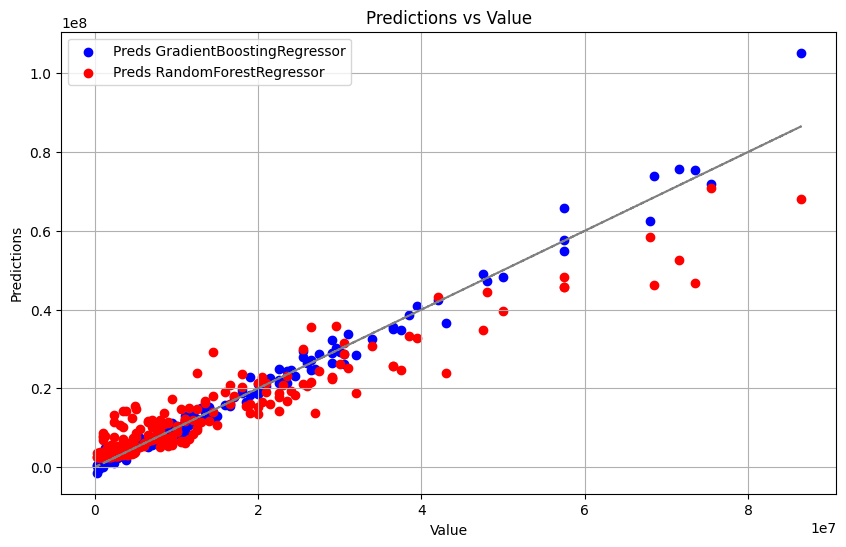

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(results['Value'], results['Pred_gbr'], color='blue', label='Preds GradientBoostingRegressor')
plt.scatter(results['Value'], results['Pred_rfr'], color='red', label='Preds RandomForestRegressor')
plt.plot(results['Value'], results['Value'], color='gray', linestyle='--')
plt.xlabel('Value')
plt.ylabel('Predictions')
plt.title('Predictions vs Value')
plt.legend()
plt.grid(True)
plt.show()